## Importing Libraries

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import folium

## Importing dataset

In [2]:
df = pd.read_csv("penalty.csv", low_memory=False)
df.head()

,X,Y,OBJECTID,ADDRESS,ISSUEDATE,LICSTATEPROV,VIOCODE,VIODESCRIPTION,VIOFINE,VOIDSTATUS,ISSUETIME,ISSUENO_MASK
0,-79.800011,43.713980,172321,13 FISHERMAN DR,2013-05-16T00:00:00.000Z,ON,93-93 Sect 46(1),PARK ON PRIVATE PROPERTY,40.0,NO,1899-12-30T04:34:00.000Z,XXX3066
1,-79.762405,43.685751,172322,27 GEORGE DR N,2013-05-16T00:00:00.000Z,ON,93-93 Sect 46(1),PARK ON PRIVATE PROPERTY,40.0,NO,1899-12-30T07:43:00.000Z,XXX1609
2,-79.745165,43.745317,172323,2100 BOVAIRD DR. E.,2013-05-16T00:00:00.000Z,ON,93-93 Sect 46(1),PARK ON PRIVATE PROPERTY,40.0,NO,1899-12-30T10:23:00.000Z,XXX7354
3,-79.745165,43.745317,172324,2100 BOVAIRD DR. E.,2013-05-16T00:00:00.000Z,ON,93-93 Sect 46(1),PARK ON PRIVATE PROPERTY,40.0,NO,1899-12-30T11:32:00.000Z,XXX7360
4,-79.745165,43.745317,172325,2100 BOVAIRD DR. E.,2013-05-16T00:00:00.000Z,ON,93-93 Sect 46(1),PARK ON PRIVATE PROPERTY,40.0,NO,1899-12-30T11:30:00.000Z,XXX7359


## Performing analysis

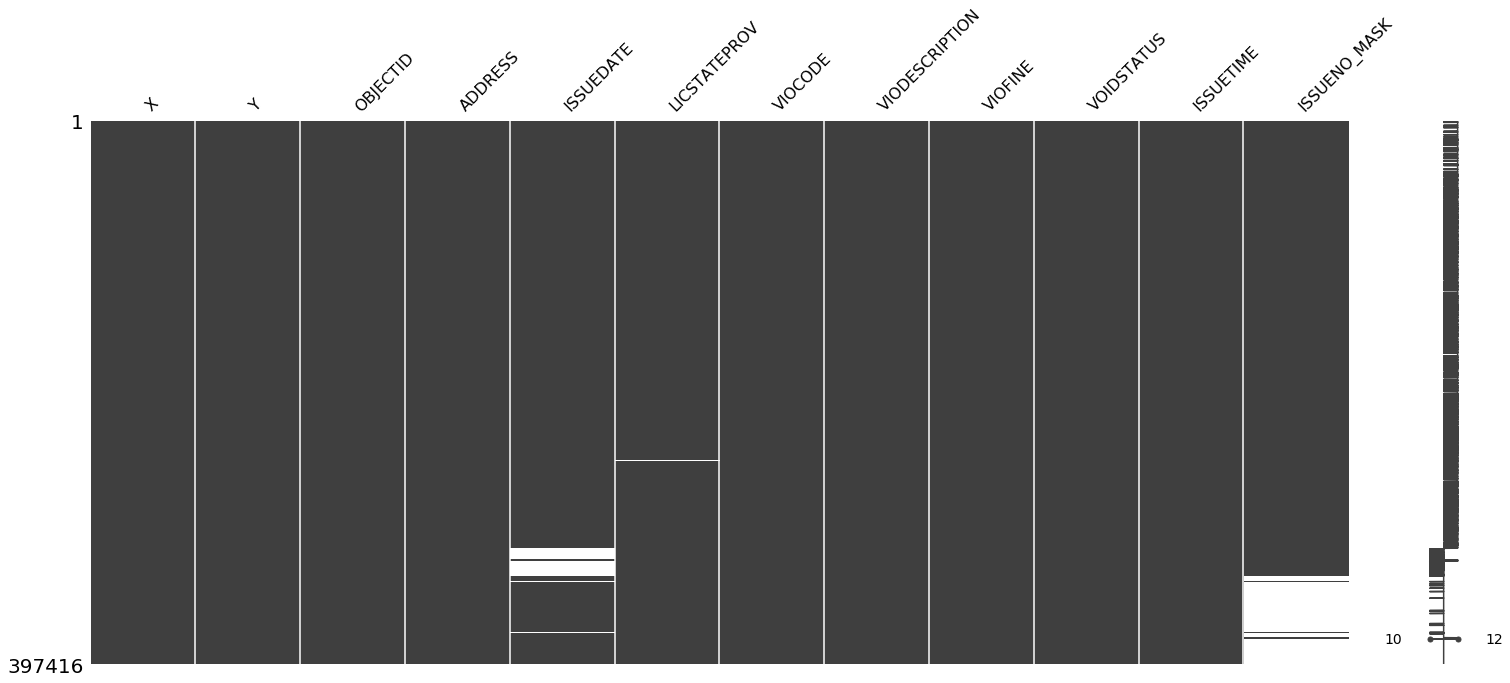

In [3]:
# Seeing missing values in a graphic visual
msno.matrix(df)

Text(0, 0.5, 'Number of events occured')

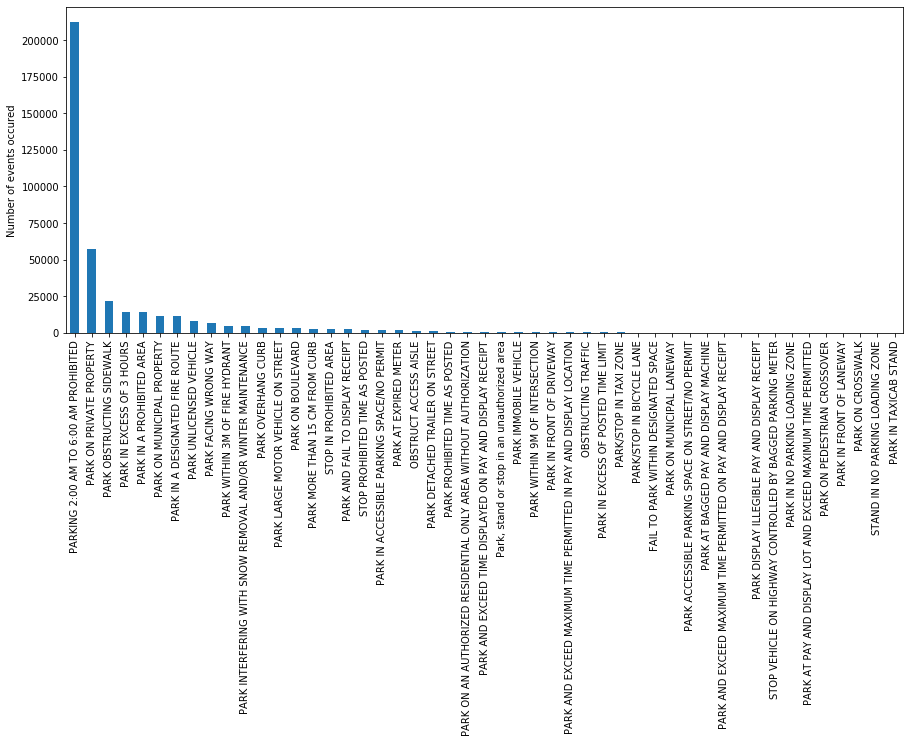

In [4]:
# Creating a chart of types of violations commited and number of events recorded
fig = df['VIODESCRIPTION'].value_counts().plot(kind='bar', figsize=(15, 6))
fig.set_ylabel('Number of events occured')

In [5]:
# Overnight parking violations have the highest frequency so we drop all other types of violations
#Then we display number of violations
df = df[df.VIODESCRIPTION == 'PARKING 2:00 AM TO 6:00 AM PROHIBITED']
df['VIODESCRIPTION'].value_counts()

PARKING 2:00 AM TO 6:00 AM PROHIBITED    212312
Name: VIODESCRIPTION, dtype: int64

In [6]:
# Dropping all other columns except street address and geolocation where violation was recorded.
df = df[['ADDRESS', 'X', 'Y']]
df.head()

,ADDRESS,X,Y
3452,19 RIVERVIEW DR,-79.735516,43.670563
3453,19 RIVERVIEW DR,-79.735516,43.670563
3454,19 RIVERVIEW DR,-79.735516,43.670563
3455,19 RIVERVIEW DR,-79.735516,43.670563
3456,19 RIVERVIEW DR,-79.735516,43.670563


In [7]:
# Making clusters of markers to mark the position of violation commmited to see in which areas most of the violations were recorded.
# This has been performed over a random sample of the data
from folium.plugins import FastMarkerCluster
subset_of_df = df.sample(n=10000)

mapper = folium.Map(location=[subset_of_df['Y'].mean(), subset_of_df['X'].mean()], zoom_start=12)

mapper.add_child(FastMarkerCluster(subset_of_df[['Y', 'X']].values.tolist()))
mapper

## Preparing the data for the openstreet library.

In [8]:
# Removing house numbers from the address column as we just need the name of the streets only.
df['ADDRESS'] = df['ADDRESS'].str.replace('\d+', '')
df.head()

,ADDRESS,X,Y
3452,RIVERVIEW DR,-79.735516,43.670563
3453,RIVERVIEW DR,-79.735516,43.670563
3454,RIVERVIEW DR,-79.735516,43.670563
3455,RIVERVIEW DR,-79.735516,43.670563
3456,RIVERVIEW DR,-79.735516,43.670563


In [9]:
# Removing words that describe where the violation was recorded in relevance to a street.
words = ['NEAR', 'AT', 'FROM', 'OPPOSITE', 'ON', 'ACROSS', 'LOT', 'VIA', 'N', 'S']
pat = r'\b(?:{})\b'.format('|'.join(words))
df['ADDRESS'] = df['ADDRESS'].str.replace(pat, '')

In [10]:
# Number of times violations were recorded on each street.
df['ADDRESS'].value_counts()

 ARCHDEKIN DR          7464
 BRAMHALL CIR           789
KINGS CROSS RD          631
ROYAL SALISBURY WAY     602
INSPIRE BLVD            542
                       ... 
 PEGGY CRT                1
HONEYCREEK CRT            1
 PERGOLA WAY              1
GLENDALE AVE              1
FERNCASTLE CRES           1
Name: ADDRESS, Length: 9855, dtype: int64

In [11]:
# Changing the street suffix from initial to complete word.
word_RD = ['RD']
pat1 = r'\b(?:{})\b'.format('|'.join(word_RD))
df['ADDRESS'] = df['ADDRESS'].str.replace(pat1, 'ROAD')

word_BLVD = ['BLVD']
pat1 = r'\b(?:{})\b'.format('|'.join(word_BLVD))
df['ADDRESS'] = df['ADDRESS'].str.replace(pat1, 'BOULEVARD')

word_DR = ['DR']
pat1 = r'\b(?:{})\b'.format('|'.join(word_DR))
df['ADDRESS'] = df['ADDRESS'].str.replace(pat1, 'DRIVE')

word_CRT = ['CRT']
pat1 = r'\b(?:{})\b'.format('|'.join(word_CRT))
df['ADDRESS'] = df['ADDRESS'].str.replace(pat1, 'COURT')

word_CRES = ['CRES']
pat1 = r'\b(?:{})\b'.format('|'.join(word_CRES))
df['ADDRESS'] = df['ADDRESS'].str.replace(pat1, 'CRESCENT')

word_AVE = ['AVE']
pat1 = r'\b(?:{})\b'.format('|'.join(word_AVE))
df['ADDRESS'] = df['ADDRESS'].str.replace(pat1, 'AVENUE')

word_TRL = ['TRL']
pat1 = r'\b(?:{})\b'.format('|'.join(word_TRL))
df['ADDRESS'] = df['ADDRESS'].str.replace(pat1, 'TRAIL')

word_ST = ['ST']
pat1 = r'\b(?:{})\b'.format('|'.join(word_ST))
df['ADDRESS'] = df['ADDRESS'].str.replace(pat1, 'STREET')

word_CIR = ['CIR']
pat1 = r'\b(?:{})\b'.format('|'.join(word_CIR))
df['ADDRESS'] = df['ADDRESS'].str.replace(pat1, 'CIRCLE')

word_PL = ['PL']
pat1 = r'\b(?:{})\b'.format('|'.join(word_PL))
df['ADDRESS'] = df['ADDRESS'].str.replace(pat1, 'PLACE')

In [12]:
df.head()

,ADDRESS,X,Y
3452,RIVERVIEW DRIVE,-79.735516,43.670563
3453,RIVERVIEW DRIVE,-79.735516,43.670563
3454,RIVERVIEW DRIVE,-79.735516,43.670563
3455,RIVERVIEW DRIVE,-79.735516,43.670563
3456,RIVERVIEW DRIVE,-79.735516,43.670563


#### Categorizing the data into subsets

In [13]:
# Subset #1 for streets where number of violations is greater than 600
# Displaying the total number of unique addresses in this subset.
subdf1 = df.groupby('ADDRESS').filter(lambda x : len(x)>=600)
len(subdf1['ADDRESS'].value_counts())

4

In [14]:
# Subset #2 for streets where number of violations is between 400 and 600
# Displaying the total number of unique addresses in this subset.
subdf2 = df.groupby('ADDRESS').filter(lambda x : len(x)>=400 and len(x)<600)
len(subdf2['ADDRESS'].value_counts())

11

In [15]:
# Subset #3 for streets where number of violations is between 300 and 400
# Displaying the total number of unique addresses in this subset.
subdf3 = df.groupby('ADDRESS').filter(lambda x : (len(x)>=300 and len(x)<400))
len(subdf3['ADDRESS'].value_counts())

19

In [16]:
# Subset #4 for streets where number of violations is between 200 and 300
# Displaying the total number of unique addresses in this subset.
subdf4 = df.groupby('ADDRESS').filter(lambda x : (len(x)>=200 and len(x)<300))
len(subdf4['ADDRESS'].value_counts())

51

In [17]:
# Subset #5 for streets where number of violations is between 100 and 200
# Displaying the total number of unique addresses in this subset.
subdf5 = df.groupby('ADDRESS').filter(lambda x : (len(x)>=100 and len(x)<200))
len(subdf5['ADDRESS'].value_counts())

361

In [18]:
# Dropping all duplicate values from the subsets so we have only unique street names.
# Then converting them into lower case strings.

# In subset #1
subdf1 = subdf1.drop_duplicates(subset=['ADDRESS'], inplace=False)
subdf1['ADDRESS'] = subdf1['ADDRESS'].str.lower()

# In subset #2
subdf2 = subdf2.drop_duplicates(subset=['ADDRESS'], keep='first', inplace=False)
subdf2['ADDRESS'] = subdf2['ADDRESS'].str.lower()

# In subset #3
subdf3 = subdf3.drop_duplicates(subset=['ADDRESS'], keep='first', inplace=False)
subdf3['ADDRESS'] = subdf3['ADDRESS'].str.lower()

# In subset #4
subdf4 = subdf4.drop_duplicates(subset=['ADDRESS'], keep='first', inplace=False)
subdf4['ADDRESS'] = subdf4['ADDRESS'].str.lower()

# In subset #5
subdf5 = subdf5.drop_duplicates(subset=['ADDRESS'], keep='first', inplace=False)
subdf5['ADDRESS'] = subdf5['ADDRESS'].str.lower()

In [20]:
# Creating a function to create different colors for the streets in each categorical subset
a = len(subdf1)
b = len(subdf2)
c = len(subdf3)
d = len(subdf4)
e = len(subdf5)
def colourcode(x):
    if ( str('default') in x):
        return '#fff034'
    elif (any(str(subdf1.iloc[i]['ADDRESS']) in x for i in range(a))):
        return '#ff0000'
    elif (any(str(subdf2.iloc[j]['ADDRESS']) in x for j in range(b))):
        return '#ff9b00'
    elif (any(str(subdf3.iloc[k]['ADDRESS']) in x for k in range(c))):
        return '#fffb00'
    elif (any(str(subdf4.iloc[l]['ADDRESS']) in x for l in range(d))):
        return '#32ff00'
    elif (any(str(subdf5.iloc[m]['ADDRESS']) in x for m in range(e))):
        return '#23ad01'
    else:
        return '#d7d7d7'

In [21]:
# Importing modules required for openstreet library.
import pyximport
pyximport.install()
import networkx as nx
import osmnx as ox
from IPython.display import IFrame
ox.config(log_console=True, use_cache=True)
ox.__version__

'0.11.3'

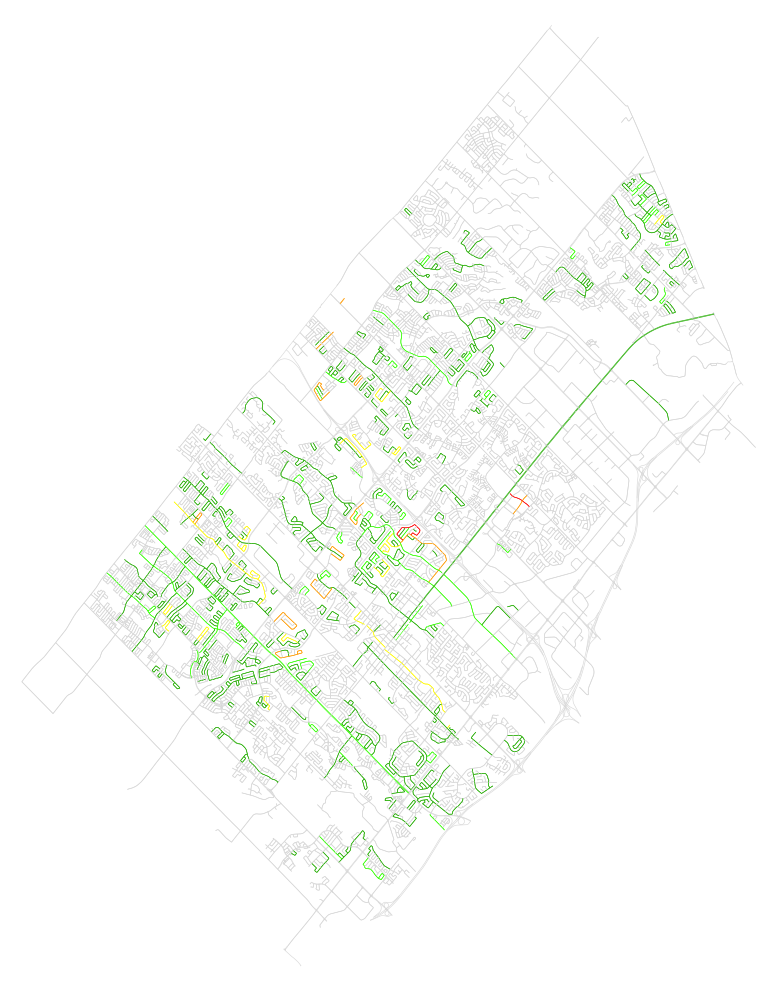

In [22]:
# Rendering the street map to visualize streets based on frequency of violations.
G = ox.graph_from_place('Brampton, Ontario, Canada', network_type='drive')

edge_attributes = ox.graph_to_gdfs(G, nodes=False)
ec = [colourcode(str(row['name']).lower()) for index, row in edge_attributes.iterrows()]

# We can finally draw the plot
fig, ax = ox.plot_graph(G, bgcolor='white', axis_off=True, node_size=0,
                        edge_color=ec, edge_linewidth=0.6, edge_alpha=1, fig_height=18, dpi=70)